# Working With Multiple Layers

First we start with loading the necessary libraries and resetting the computational graph.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pathlib
# from tensorflow.python.framework import ops
tf.reset_default_graph()

In [4]:
import matplotlib.pyplot as plt

### Create a Graph Session

In [3]:
sess = tf.Session()

### Create Tensors

Here we will create a small image of size 4x4 pixels and propagate it through multiple layers.

([], <a list of 0 Text yticklabel objects>)

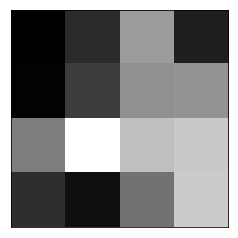

In [7]:
# Create a small random 'image' of size 4x4
x_shape = [1, 4, 4, 1]
x_val = np.random.uniform(size=x_shape)
plt.imshow(x_val[0, :, :, 0], cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.show()

### Create the Data Placeholder

In [8]:
x_data = tf.placeholder(tf.float32, shape=x_shape)

### First Layer: Moving Window (Convolution)

Our first layer will be a spatial moving window of size [2x2] with stride 2 (in both height and width directions)

To make this a moving window average, the value of the filter will be all 0.25.

In [9]:
# Create a layer that takes a spatial moving window average
# Our window will be 2x2 with a stride of 2 for height and width
# The filter value will be 0.25 because we want the average of the 2x2 window
my_filter = tf.constant(0.25, shape=[2, 2, 1, 1])
my_strides = [1, 2, 2, 1]
mov_avg_layer= tf.nn.conv2d(x_data, my_filter, my_strides,
                            padding='SAME', name='Moving_Avg_Window')

### Second Layer: Custom

Our second layer will be a custom layer.  Given an input, x, this layer flattens out x and computes sigmoid(Ax+b).  Here, A and b will be predetermined constants.

We then add the custom layer to the graph under the name 'Custom_Layer'.  This is for visualizing the graph in Tensorboard later.

In [10]:
# Define a custom layer which will be sigmoid(Ax+b) where
# x is a 2x2 matrix and A and b are 2x2 matrices
def custom_layer(input_matrix):
    input_matrix_sqeezed = tf.squeeze(input_matrix)
    A = tf.constant([[1., 2.], [-1., 3.]])
    b = tf.constant(1., shape=[2, 2])
    temp = tf.matmul(A, input_matrix_sqeezed)
    temp = tf.add(temp, b) # Ax + b
    return(tf.sigmoid(temp))

# Add custom layer to graph
with tf.name_scope('Custom_Layer') as scope:
    custom_layer1 = custom_layer(mov_avg_layer)

https://www.tensorflow.org/api_docs/python/tf/squeeze  

`tf.squeeze()` removes dimensions of size 1 from the shape of a tensor.

### Run Output

The output should be an array that is 2x2, but size (1,2,2,1)

[[[[0.8830018 ]
   [0.5237877 ]]

  [[0.5602738 ]
   [0.30143422]]]]


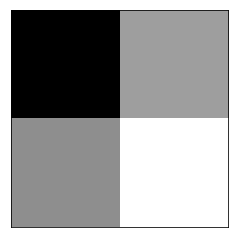

In [14]:
conv_out = sess.run(mov_avg_layer, feed_dict={x_data: x_val})
print(conv_out)
plt.imshow(conv_out[0, :, :, 0], cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.show()

After custom operation, size is now 2x2 (squeezed out size 1 dims), see below:

In [15]:
print(sess.run(custom_layer1, feed_dict={x_data: x_val}))

[[0.9527343  0.89346707]
 [0.85788333 0.7990737 ]]


Save summaries for viewing in Tensorboard:

In [17]:
merged = tf.summary.merge_all(key='summaries')

file = pathlib.Path('tensorboard_logs/')
if not file.exists():
    file.mkdir()

my_writer = tf.summary.FileWriter('tensorboard_logs/', sess.graph)

![multiple_layers_tensorboard](https://github.com/nfmcclure/tensorflow_cookbook/raw/master/02_TensorFlow_Way/images/03_Multiple_Layers.png)